# Declaration of Originality

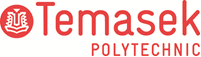

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : STA ANA ELISHA GABRIELLE BENEDICTO (2404671F)
* Tutorial Group                : T05
* Tutor						    : KIAN ENG ONG
* Submission Date               : 11 FEB 2026

**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [46]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# 1. Business Understanding
Banks run term deposit marketing campaigns, but most customers do not subscribe, causing high outreach cost and wasted effort. The goal of this project is to build a supervised machine learning classification model that predicts whether a customer will subscribe to a term deposit (y = yes/no) so marketing teams can focus on higher-potential customers, improve conversion rate, and reduce unnecessary calls. This is a binary classification problem because the output has two categories (“yes” or “no”). The target users are marketing staff who need support deciding which customers to prioritize.

Goal: The goal of this project is to develop a supervised machine learning classification model that predicts whether a bank customer will subscribe to a term deposit, in order to help marketing teams target high-potential customers more effectively and reduce unnecessary marketing costs.

# 2. Data Understanding


## 2.1 Load dataset

This project uses the UCI Bank Marketing dataset, which contains information from direct marketing campaigns conducted by a Portuguese bank. The dataset consists of 45,211 records with multiple customer-related features such as age, job, education, financial status, and previous marketing interactions. The target variable is y, which indicates whether a customer subscribed to a term deposit (yes or no). This is a binary classification problem, as the objective is to predict one of two possible outcomes.

In [47]:
## Read *.csv file into pandas DataFrame
df = pd.read_excel("bank-full.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2.2 Summary Statistics


In [48]:
## Understand the type of variable for each column
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


((45211, 17), None)

This output shows the overall structure of the dataset. It confirms that the dataset contains 45,211 customer records with 17 features, including both numerical and categorical variables. All columns have complete values, indicating there are no missing entries at this stage.

In [49]:
## Check for missing data
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The missing value check shows that there are no missing values in any column. This means the dataset does not require missing value imputation or deletion is required. 

In [50]:
## Describe data distribution
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The descriptive statistics summarise the distribution of numerical features. Some variables, such as balance and duration, show a wide range of values, indicating high variability. 

An initial exploration of the dataset was performed using df.shape, df.info(), df.isnull().sum(), and df.describe() to understand its structure, completeness, and statistical properties. The dataset consists of 45,211 customer records and 17 columns, including 16 input features and one categorical target variable (y) indicating whether a customer subscribed to a term deposit. Inspection of data types reveals a mix of numerical variables (such as age, account balance, campaign duration, and number of contacts) and categorical variables (such as job type, education level, housing loan status, and previous campaign outcome), confirming that the dataset is suitable for a supervised binary classification task.

A missing value check shows that there are no null (NaN) values across all columns, indicating that the dataset is complete and does not require missing value imputation. However, several categorical variables contain "unknown" values, which represent valid but unrecorded information rather than missing data and will be handled during preprocessing. Descriptive statistics of numerical features indicate that variables such as age fall within reasonable ranges, while financial attributes like balance and campaign-related features such as duration and campaign exhibit wide variability and skewness. This suggests the presence of outliers and differing customer behaviours, which may influence model performance. Additionally, the target variable is heavily imbalanced, with a much larger proportion of customers not subscribing compared to those who did, highlighting the need for appropriate evaluation metrics beyond accuracy in later stages. Overall, this initial inspection confirms that the dataset is clean, well-structured, and suitable for further exploratory analysis and machine learning modelling.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [51]:
## Understanding distribution of target
df['y'].value_counts()



y
no     39922
yes     5289
Name: count, dtype: int64

In [52]:
# Percentage distribution of target variable
df["y"].value_counts(normalize=True) * 100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

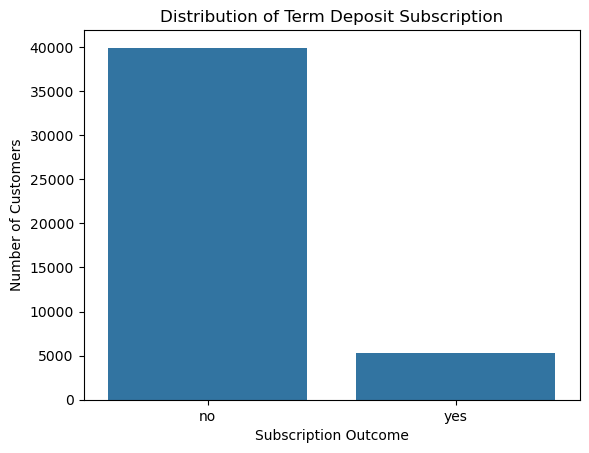

In [53]:
sns.countplot(x="y", data=df)
plt.title("Distribution of Term Deposit Subscription")
plt.xlabel("Subscription Outcome")
plt.ylabel("Number of Customers")
plt.show()

The target variable y represents whether a customer subscribed to a term deposit, with two possible outcomes: yes and no. From the count plot, it is clear that the dataset is highly imbalanced, with a much larger number of customers falling under the no category compared to the yes category. 39,922 customers did not subscribe, while only 5289 customers subscribed to the term deposit.

This imbalance indicates that the majority of customers contacted during the marketing campaigns chose not to subscribe. As a result, a predictive model trained on this data may be biased toward predicting the majority class (no) if class imbalance is not carefully addressed. This characteristic is important to recognise early, as it affects model evaluation and motivates the use of metrics such as precision, recall, and F1-score in later stages, rather than relying solely on accuracy.

### 2.3.1.2 Understanding distribution of features

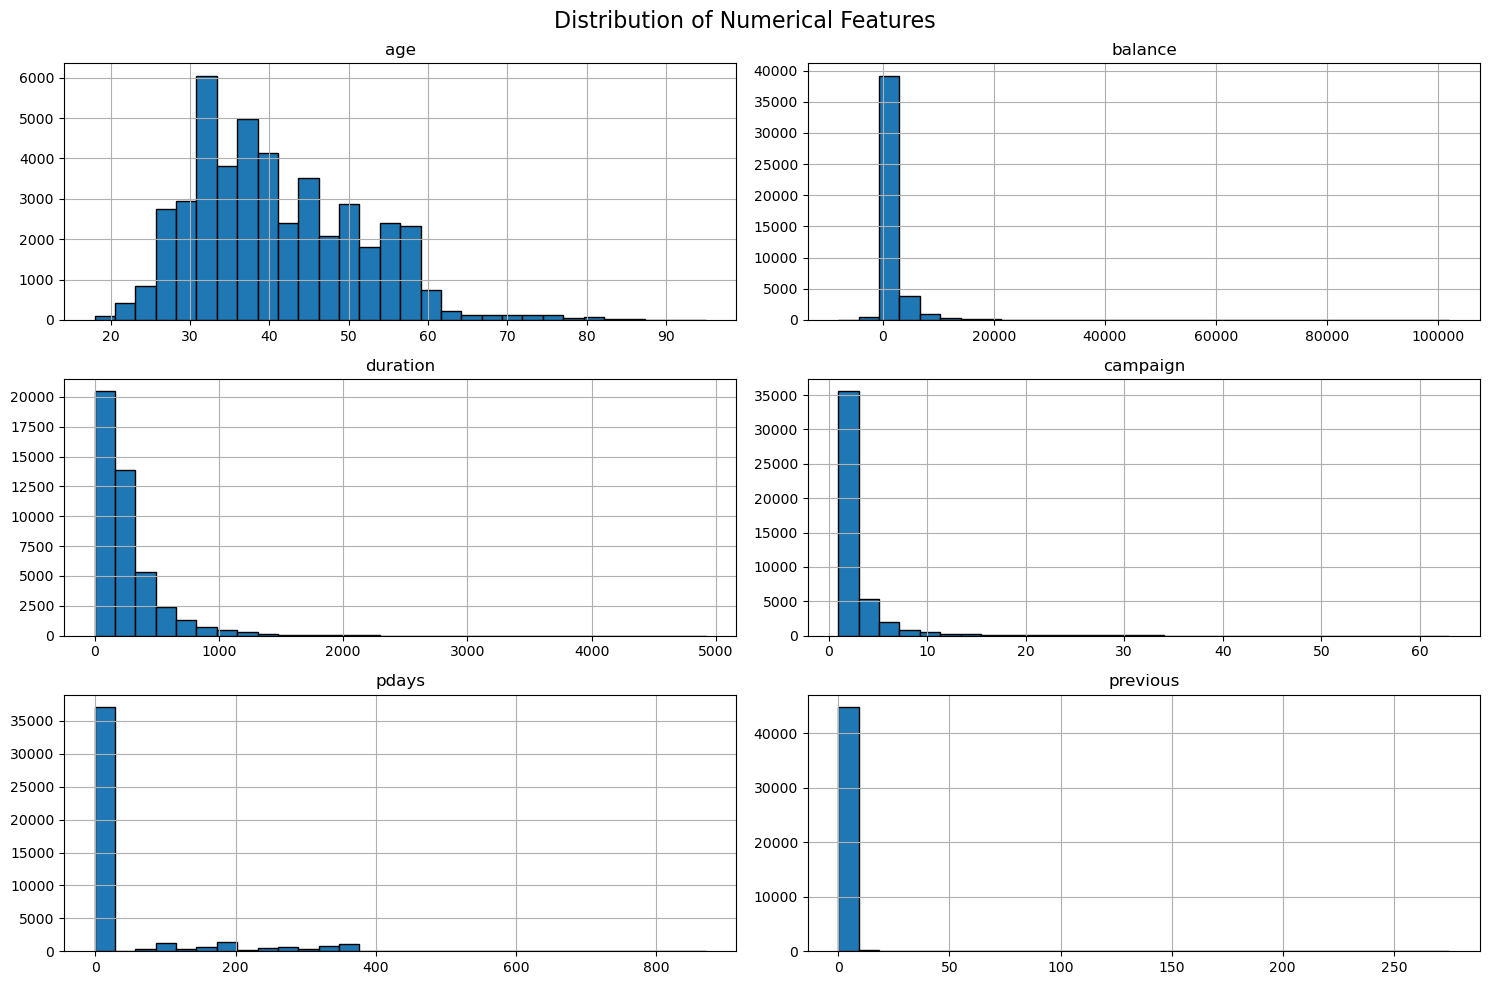

In [54]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]

df[numerical_features].hist(
    figsize=(15, 10),
    bins=30,
    edgecolor="black"
)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


The numerical features analysed include age, balance, call duration, number of contacts during the campaign (campaign), days since last contact (pdays), and number of previous contacts (previous). Histograms were used to visualise the distribution of these variables and identify patterns such as skewness, spread, and the presence of extreme values.

From the plots, age shows a roughly bell-shaped distribution concentrated between the late 20s and early 50s, indicating that most customers fall within the working-age population. In contrast, balance is heavily right-skewed, with a large proportion of customers holding relatively low account balances and a small number of customers having extremely high balances. This suggests the presence of significant outliers and highlights the uneven financial distribution within the customer base.

The call duration feature is also strongly right-skewed, with most calls lasting a short amount of time and only a small number of very long calls. This reflects real-world marketing behaviour, where most interactions are brief, while longer conversations may indicate higher customer engagement. Similarly, the campaign variable shows that most customers were contacted only a few times, with a long tail representing customers who were contacted many times during a campaign.

For pdays and previous, a large concentration of values appears at or near zero, indicating that many customers were either not contacted in previous campaigns or were contacted only once. The presence of extreme values in these features suggests that prior campaign history varies widely across customers and may carry predictive significance despite being unevenly distributed.

Overall, the numerical feature distributions reveal substantial skewness and outliers, reinforcing the need for careful feature scaling and supporting the use of robust or tree-based models that can better handle non-normal distributions.

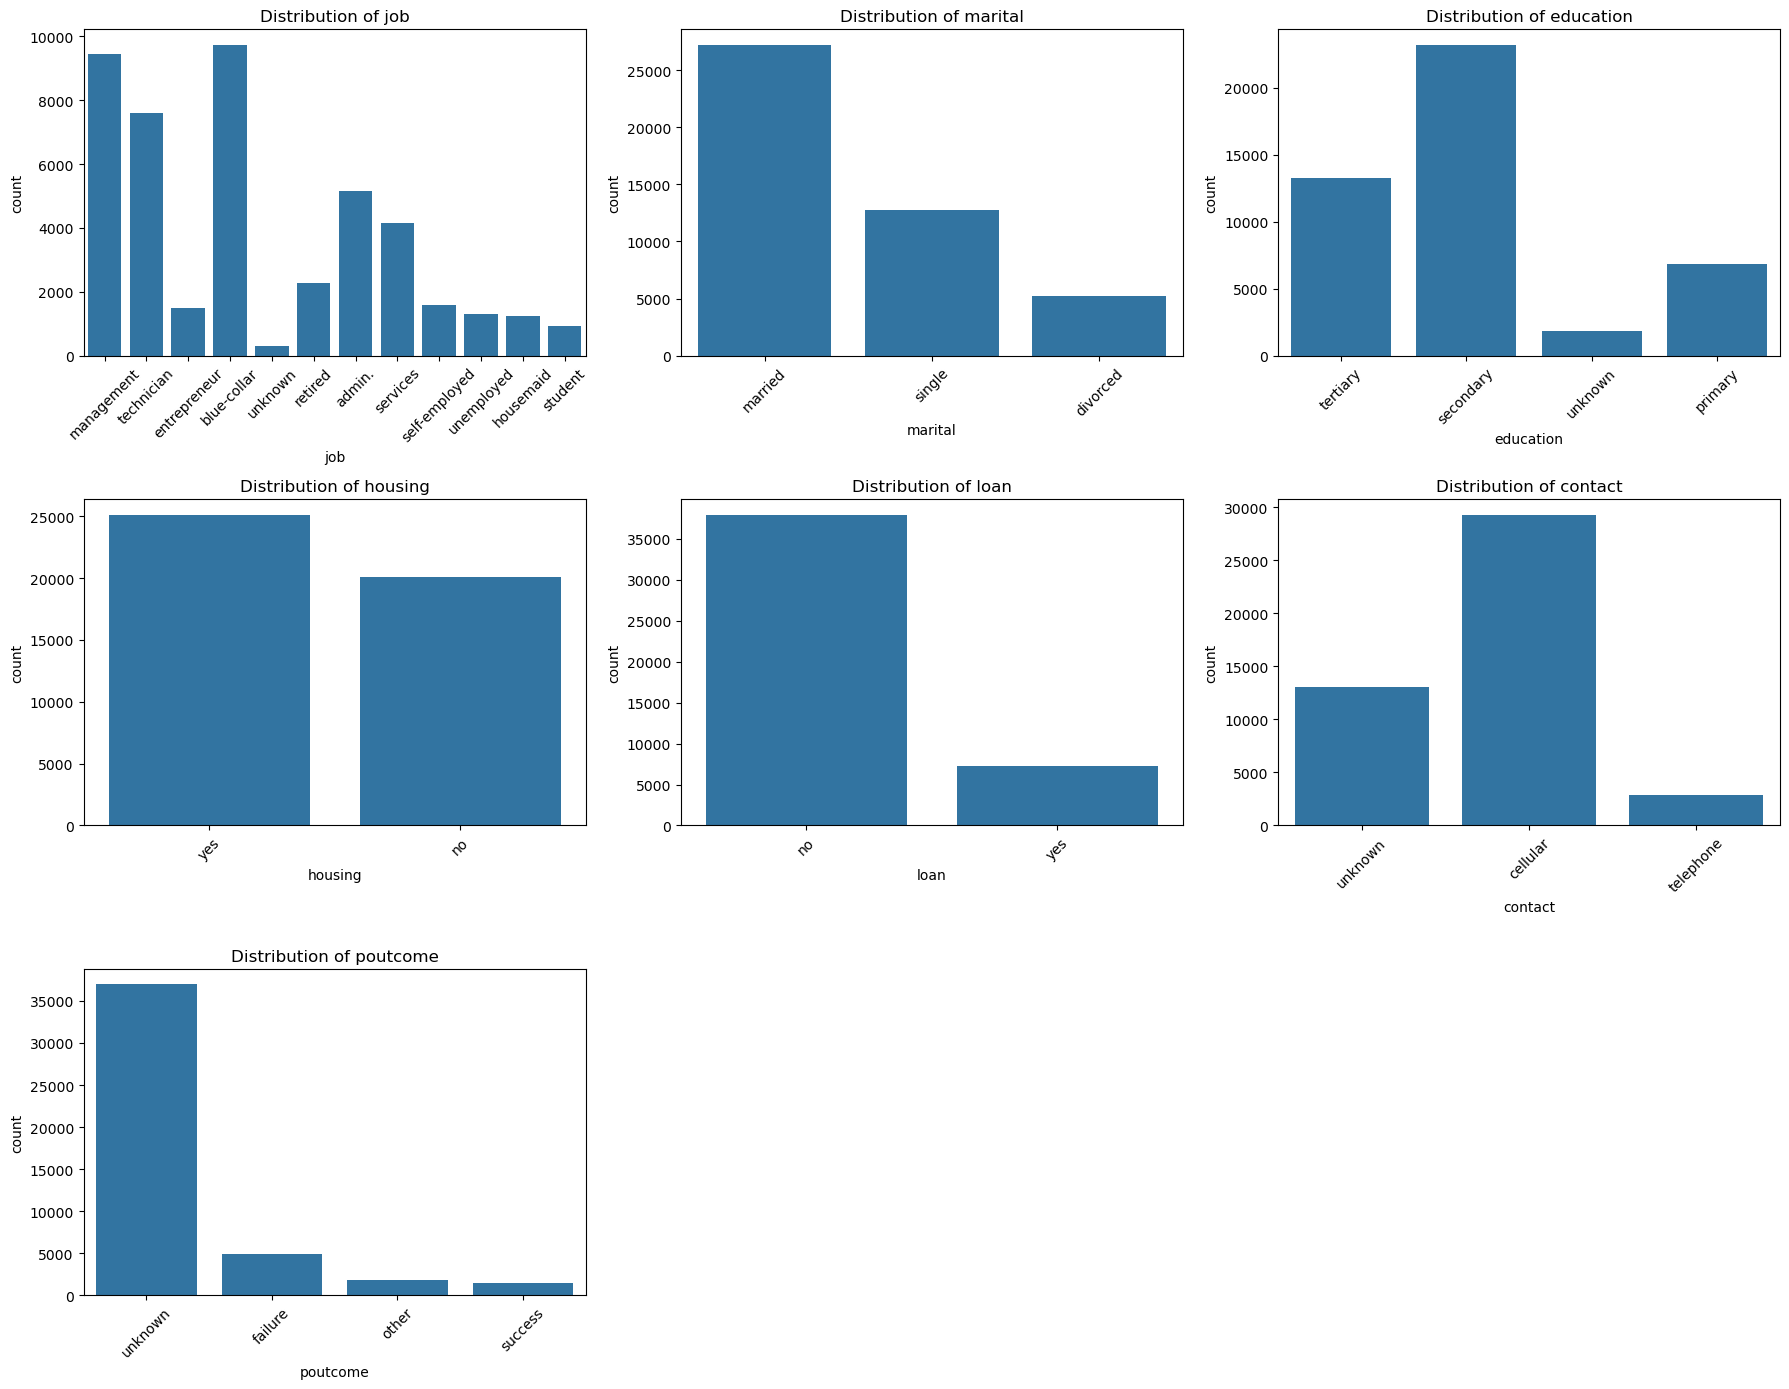

In [55]:
categorical_features = ["job", "marital", "education", "housing", "loan", "contact", "poutcome"]

plt.figure(figsize=(18, 14))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


The categorical features analysed include job, marital status, education, housing loan, personal loan, contact type, and previous campaign outcome (poutcome). Count plots were used to visualise the frequency of each category and understand how customers are distributed across different groups.

The job distribution shows that customer occupations are concentrated in a few dominant categories such as blue-collar, management, technician, and services, while other occupations (e.g. student, housemaid, unknown) appear much less frequently. This indicates that the dataset primarily represents a limited set of occupational groups rather than an evenly distributed workforce.

For marital status, the majority of customers are married, followed by single, with divorced customers forming the smallest group. This suggests that marketing campaigns largely target or reach individuals with family commitments, which may influence financial decision-making. Similarly, education levels are dominated by secondary and tertiary education, while primary education and unknown education categories account for a smaller proportion of customers.

Financial commitment features such as housing loan and personal loan are noticeably imbalanced. Most customers either have no personal loan or are split unevenly across housing loan categories, indicating varying levels of financial obligation. These imbalances suggest that loan status could play an important role in predicting subscription behaviour.

Campaign communication features further highlight structural patterns. The contact variable shows a strong dominance of cellular communication compared to telephone or unknown contact methods, reflecting modern marketing practices. Lastly, the poutcome feature is highly skewed, with the majority of customers falling under the unknown category, while success outcomes are relatively rare. This suggests that prior campaign success is uncommon but potentially highly informative when present.

Overall, the categorical feature distributions indicate that the dataset contains dominant customer segments and a long tail of infrequent categories. These patterns provide important context for feature encoding, model interpretation, and performance evaluation, as imbalanced categories may influence how predictive signals are learned during modelling.

### 2.3.2 Understanding relationship between variables

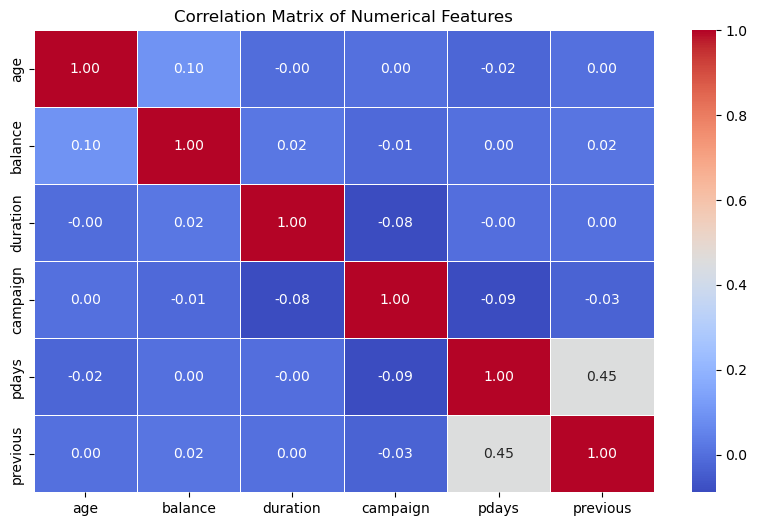

In [56]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


The correlation heatmap illustrates the strength and direction of linear relationships between numerical features. Overall, most feature pairs show weak correlations close to zero, indicating that the numerical variables capture largely independent aspects of customer behaviour. This is desirable for predictive modelling, as it reduces the risk of multicollinearity and suggests that each feature contributes unique information.

The strongest relationship is observed between pdays and previous, which display a moderate positive correlation. This relationship is expected because both variables describe historical campaign interactions — customers contacted in previous campaigns are more likely to have a recorded number of days since their last contact. However, the correlation is not strong enough to indicate redundancy, as previous reflects frequency of past interactions, while pdays captures recency.

Other features such as age, balance, duration, and campaign show minimal correlation with one another, suggesting that demographic, financial, and engagement-related variables are largely independent. This supports the use of linear models such as Logistic Regression, while also highlighting that important predictive patterns may be non-linear, motivating the use of more flexible models.

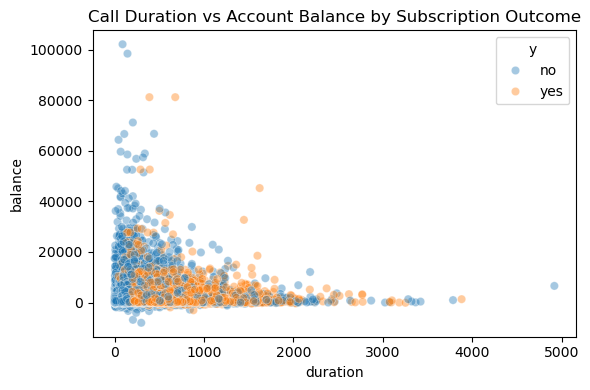

In [57]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="duration", y="balance", hue="y", alpha=0.4)
plt.title("Call Duration vs Account Balance by Subscription Outcome")
plt.tight_layout()
plt.show()


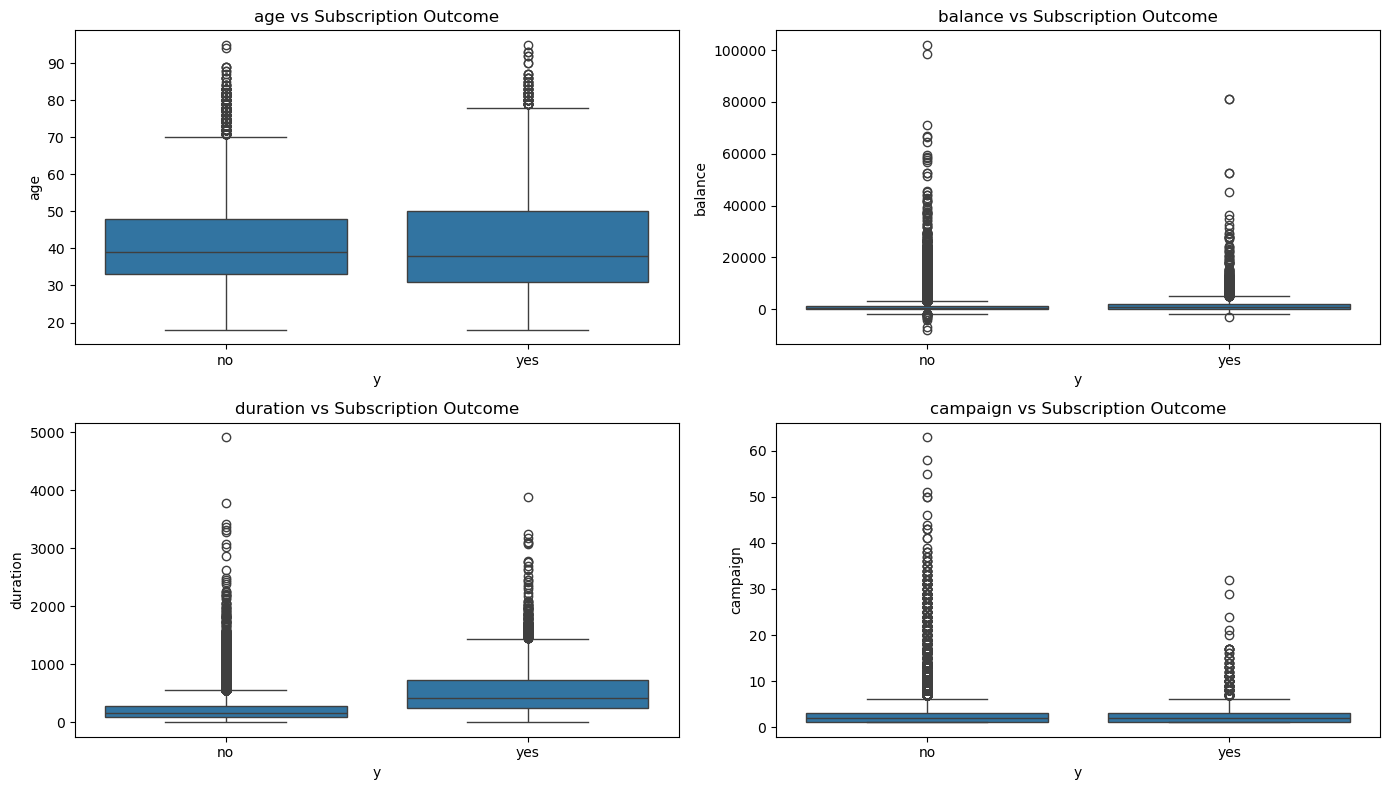

In [58]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(["age", "balance", "duration", "campaign"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="y", y=col, data=df)
    plt.title(f"{col} vs Subscription Outcome")

plt.tight_layout()
plt.show()


The boxplots compare the distribution of numerical features between customers who subscribed and those who did not subscribe, highlighting differences in central tendency, spread, and outliers.

Among all features, call duration shows the most pronounced separation between the two classes. Customers who subscribed tend to have significantly longer call durations, indicating higher engagement during marketing interactions. This suggests that duration is a strong behavioural indicator of subscription likelihood. However, it is important to note that duration is only known after a call has ended, meaning it may introduce data leakage if used directly in real-world prediction scenarios and should be interpreted with caution.

The campaign feature shows that customers who subscribed were typically contacted fewer times, while repeated contact is more common among non-subscribers. This suggests diminishing returns from repeated calls and highlights the importance of efficient targeting rather than increased contact frequency.

For balance, both subscribed and non-subscribed customers exhibit highly skewed distributions with extreme outliers. While subscribers tend to have slightly higher median balances, there is substantial overlap between the two groups, indicating that balance alone is not a strong discriminator but may still contribute predictive value in combination with other features.

The age distribution shows only modest differences between the two classes, suggesting that demographic characteristics play a secondary role compared to behavioural variables such as engagement and campaign history.

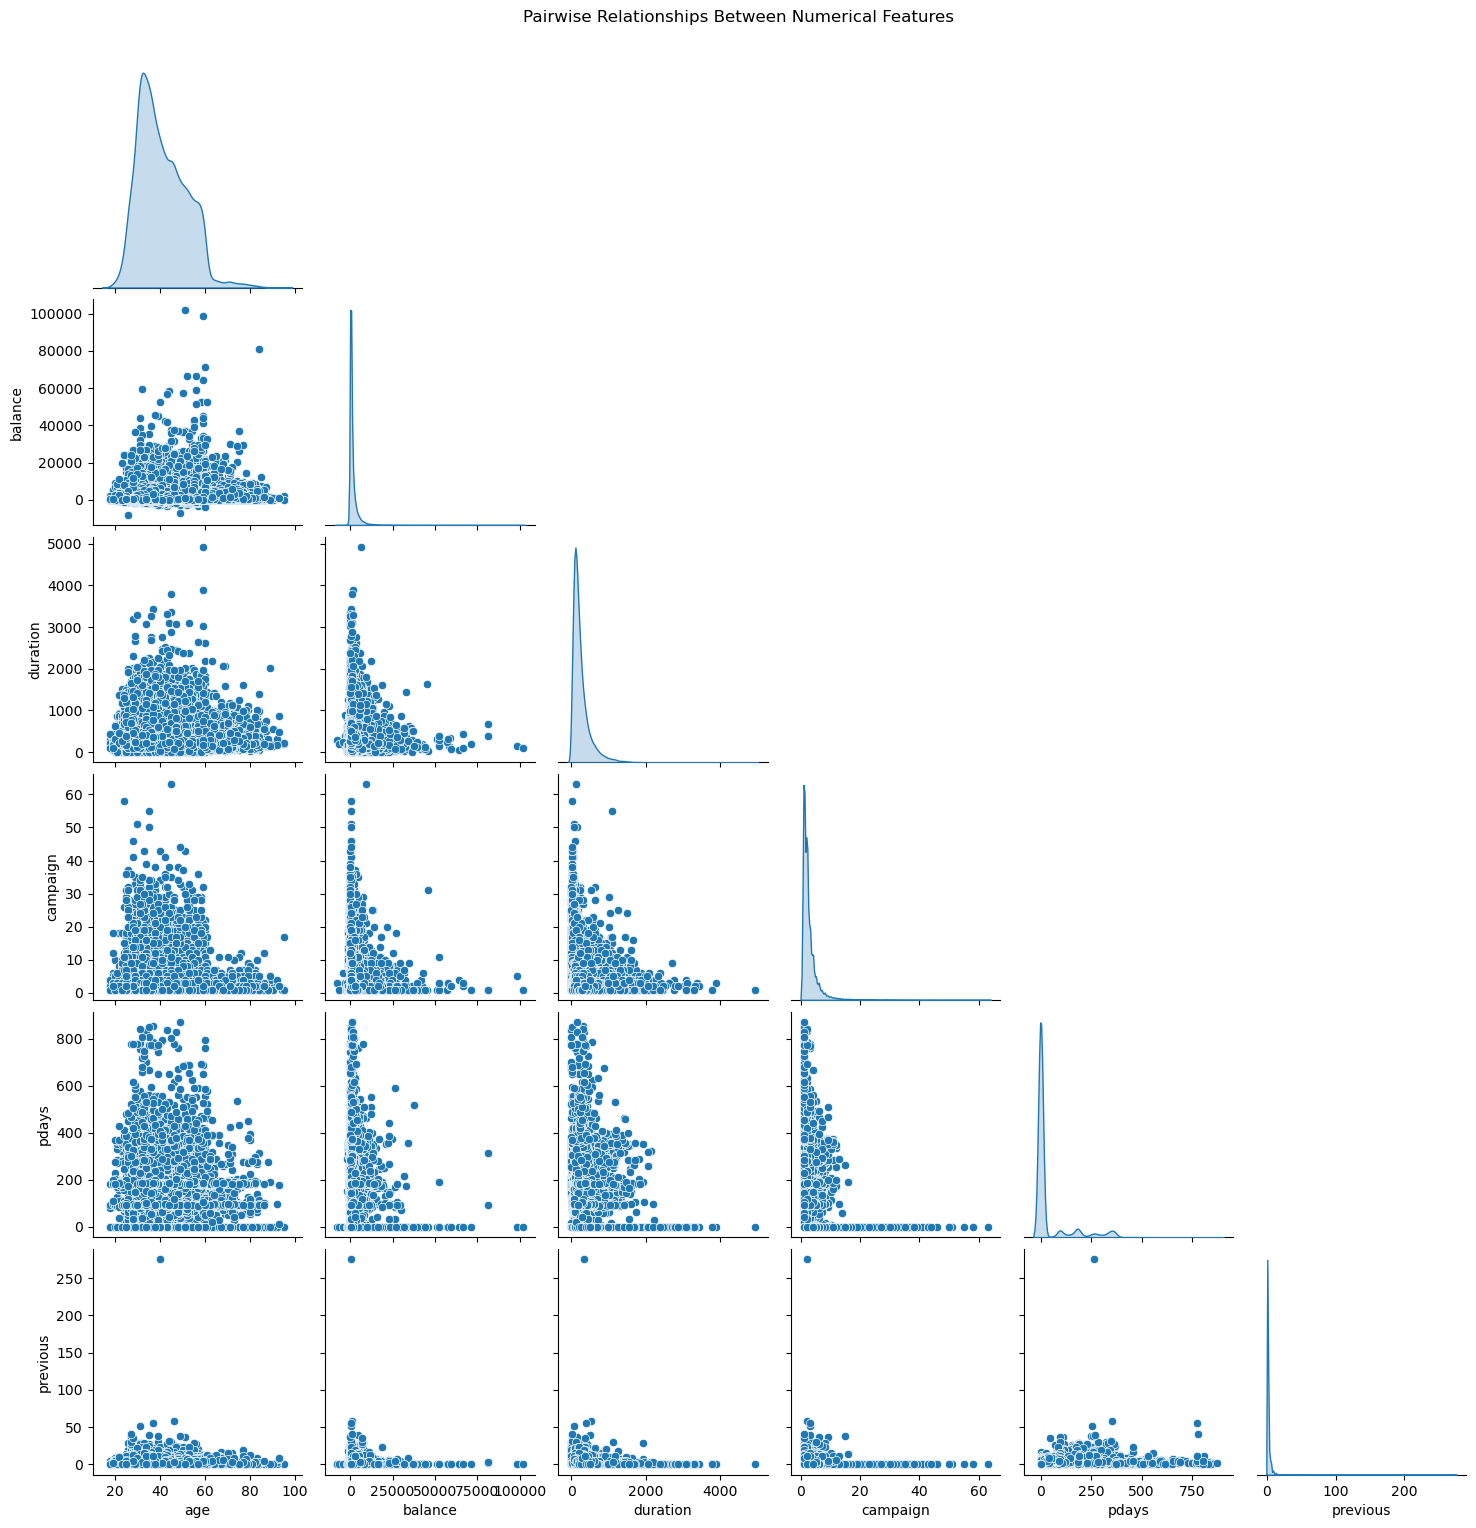

In [59]:
sns.pairplot(
    df[numerical_features],
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()


The pairwise plots provide a visual overview of relationships between numerical variables beyond linear correlation. Most feature pairs exhibit diffuse patterns rather than clear linear trends, suggesting that relationships between variables are non-linear and complex.

The diagonal density plots further confirm strong skewness in features such as duration, campaign, and pdays, reinforcing the need for models capable of handling non-normal distributions. These observations support the later use of ensemble-based methods such as Random Forest, which are robust to skewed and non-linear data.

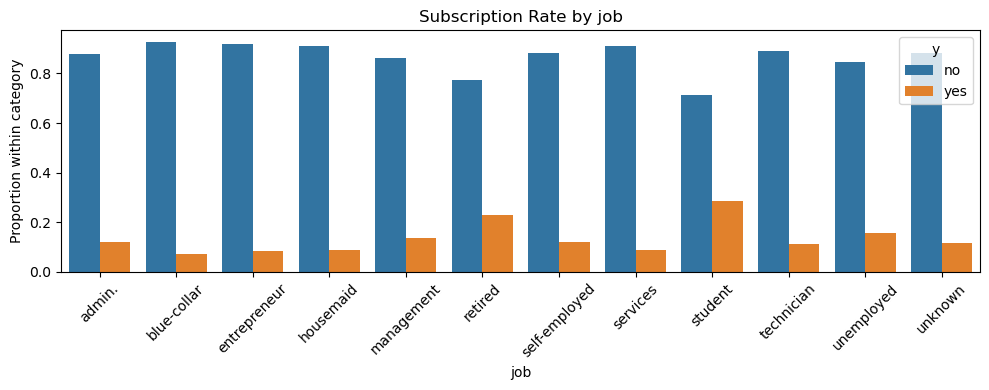

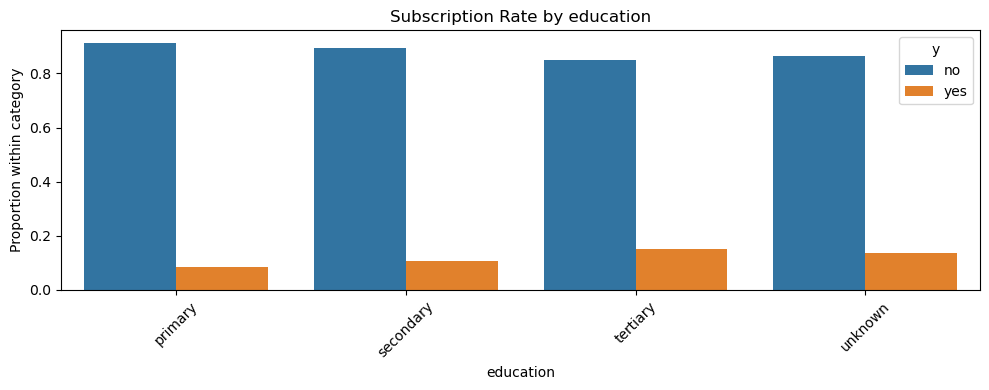

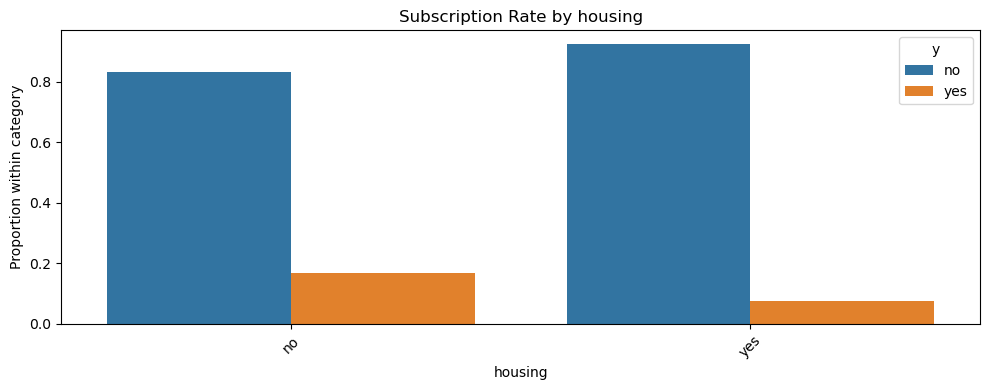

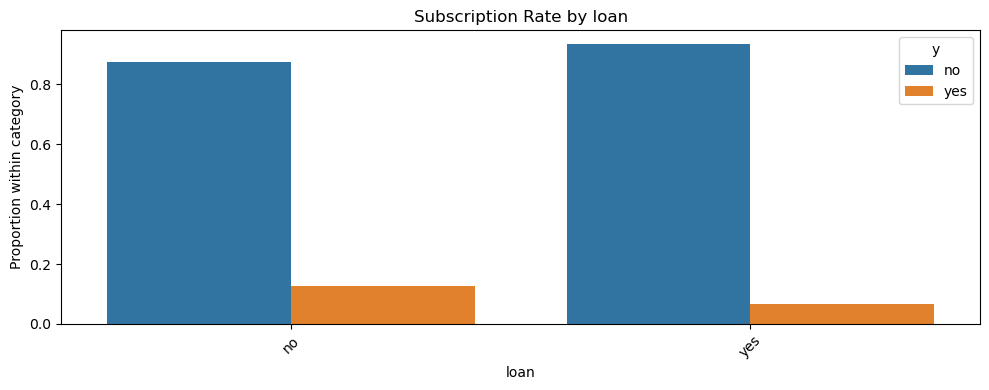

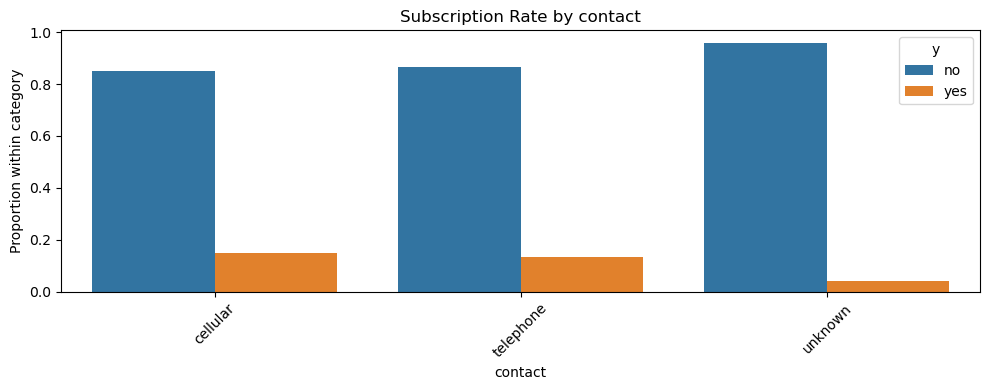

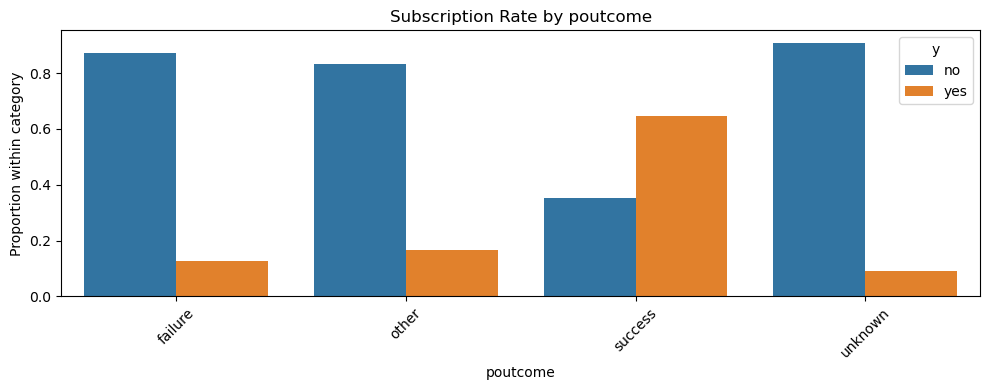

In [60]:

categorical_features = ["job", "education", "housing", "loan", "contact", "poutcome"]

for col in categorical_features:
    # 1) subscription proportions within each category (row-normalized)
    rate_df = pd.crosstab(df[col], df["y"], normalize="index").reset_index()

    # 2) convert wide -> long format for seaborn barplot
    rate_long = rate_df.melt(
        id_vars=col,
        value_vars=["no", "yes"],
        var_name="y",
        value_name="proportion"
    )

    plt.figure(figsize=(10, 4))
    sns.barplot(data=rate_long, x=col, y="proportion", hue="y")
    plt.title(f"Subscription Rate by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Proportion within category")
    plt.tight_layout()
    plt.show()


These plots show the proportion of customers who subscribed within each category, allowing fair comparison across groups of different sizes. Several categorical features exhibit clear relationships with the target variable.

Customers without housing loans or personal loans show higher subscription rates, suggesting that lower financial obligations may increase willingness to invest in term deposits. The contact method also plays a role, with cellular contact associated with higher subscription proportions, reflecting more effective or personalised communication.

The strongest relationship is observed for previous campaign outcome (poutcome). Customers with a prior successful outcome have a substantially higher likelihood of subscribing, while those with previous failures or unknown outcomes are far less responsive. This indicates strong behavioural persistence and makes poutcome one of the most informative predictors in the dataset.

Other categorical variables such as job and education show moderate variation in subscription rates across categories, suggesting that socio-economic factors influence behaviour but are less decisive than campaign history and engagement-related features.

The relationship analysis reveals that subscription behaviour is driven primarily by customer engagement and historical campaign interactions, rather than demographic characteristics alone. Numerical features show low multicollinearity, supporting the use of linear models, while skewed distributions, interaction effects, and categorical splits indicate the presence of non-linear patterns. These findings justify the use of both Logistic Regression for baseline modelling and tree-based models such as Random Forest to capture more complex relationships in subsequent modelling stages.

# 3. Data Preparation

## 3.1 Data Cleaning

## 3.2 Train-Test Split

# 4. Modelling

### 4.2 Train Model

# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection